In [1]:
# Use this to visualize tweaks to 'config.csv'

import pandas as pd
import matplotlib.pyplot as plt
import random
import string
from PIL import Image, ImageFont, ImageDraw

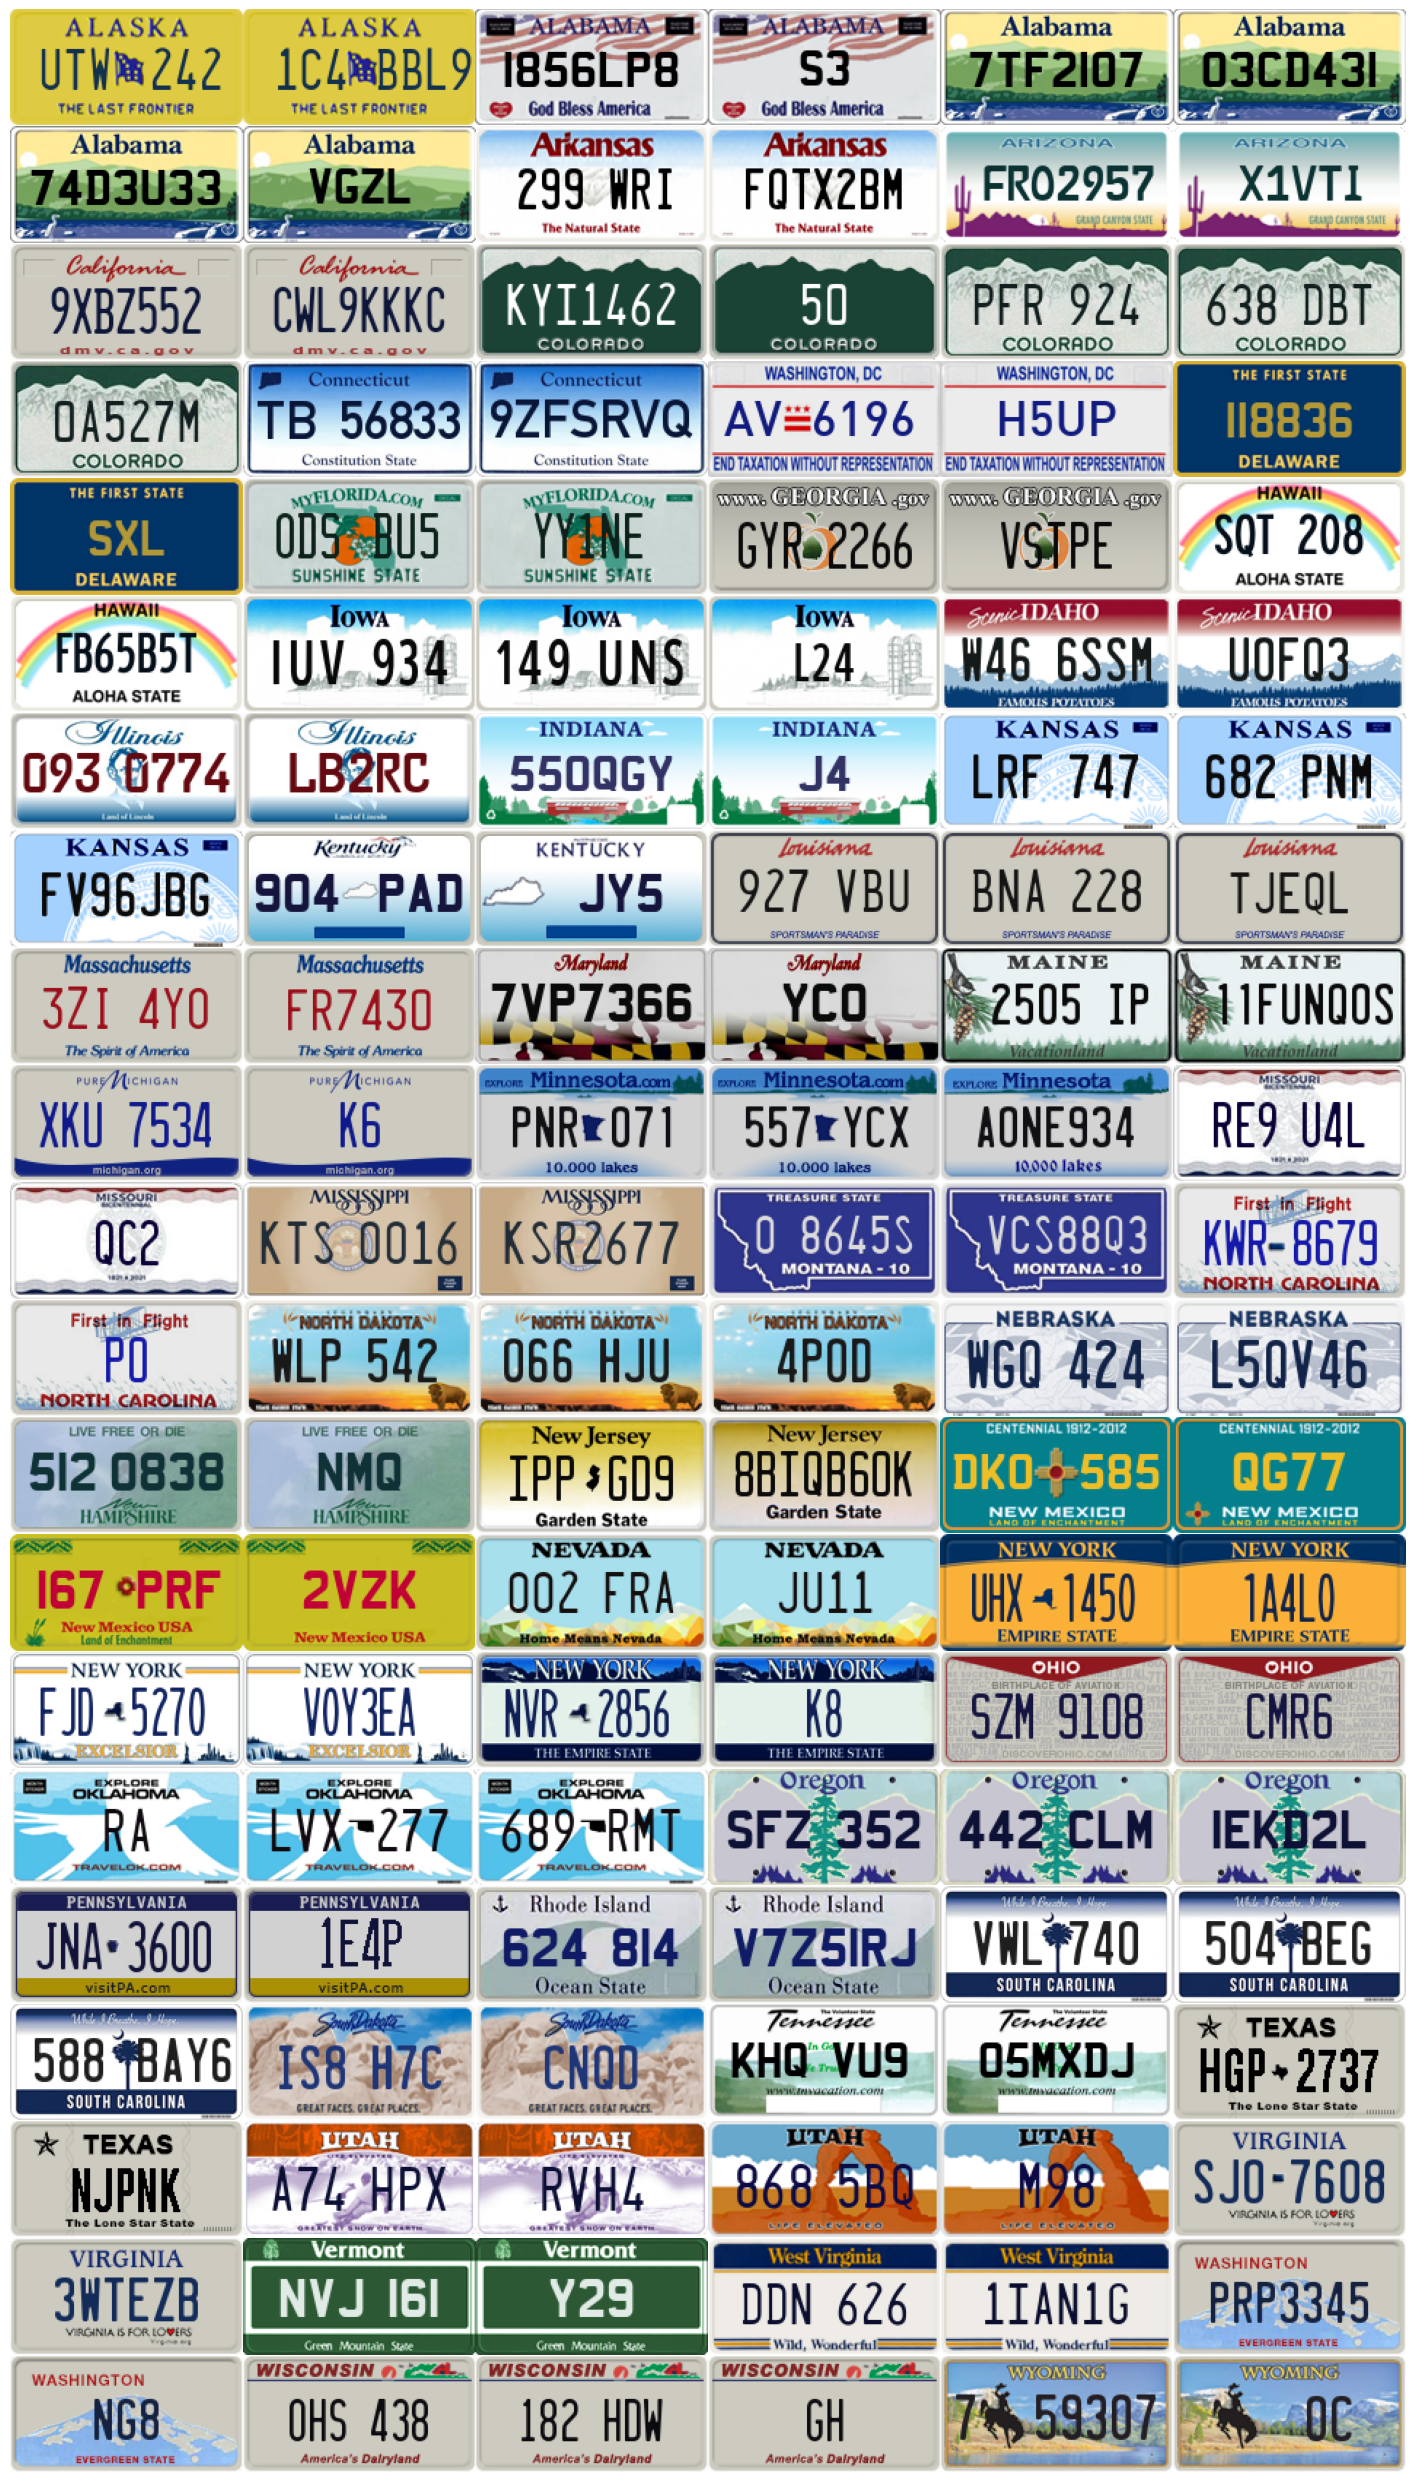

In [40]:
meta=pd.read_csv('config.csv')
DEFAULT_FONT_SIZE = 30

# Helper function to generate random text
def generate_text(template):
    result = []
    for char in template:
        if char == '0':
            result.append(str(random.randint(0, 9)))
        elif char == 'A':
            result.append(random.choice(string.ascii_uppercase))
        elif char == 'X':
            result.append(random.choice(string.ascii_uppercase + string.digits))
    return ''.join(result)

# Main code
fig, axes = plt.subplots(21, 6, figsize=(18, 32))

for ax, row in zip(axes.ravel(), meta.iterrows()):
    image_path = row[1]['PATH']
    img = Image.open(image_path)

    font_path = row[1]['FONT']
    size_modifier = float(row[1]['SIZE']) / 100.0
    font_size = int(DEFAULT_FONT_SIZE * size_modifier)
    font_color = tuple(map(int, row[1]['RGB'].split(',')))

    font = ImageFont.truetype(font_path, font_size)
    draw = ImageDraw.Draw(img)

    # Fetch the movement values
    x_mov = int(row[1]['X-MOV'])
    y_mov = int(row[1]['Y-MOV'])
    
    # Determine the text and its position
    if pd.notna(row[1]['CENTER']):
        center_text = row[1]['CENTER']
        # Check for the special 'XXXXXXXX' case
        # Check if the 'CENTER' contains only the character 'X'
        if set(center_text) == {'X'}:
            # Generate a list of templates from 'XX' up to the length of 'CENTER'
            templates = ['X' * i for i in range(2, len(center_text) + 1)]
            chosen_template = random.choice(templates)
            text = generate_text(chosen_template)
            #text = generate_text(center_text)
        else:
            text = generate_text(center_text)
        text_bbox = draw.textbbox((0, 0), text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        x = ((160 - text_width) // 2) + x_mov
        y = ((80 - text_height) // 2) + y_mov
        draw.text((x, y), text, font=font, fill=font_color)
    else:
        left_text = generate_text(row[1]['LEFT'])
        right_text = generate_text(row[1]['RIGHT'])
        space = row[1]['SPACE']

        left_text_bbox = draw.textbbox((0, 0), left_text, font=font)
        right_text_bbox = draw.textbbox((0, 0), right_text, font=font)
        left_text_width = left_text_bbox[2] - left_text_bbox[0]
        right_text_width = right_text_bbox[2] - right_text_bbox[0]
        
        total_width = left_text_width + space + right_text_width
        
        y = ((80 - (left_text_bbox[3] - left_text_bbox[1])) // 2) + y_mov
        x_left = ((160 - total_width) // 2) + x_mov
        x_right = x_left + left_text_width + space
        
        draw.text((x_left, y), left_text, font=font, fill=font_color)
        draw.text((x_right, y), right_text, font=font, fill=font_color)

    ax.imshow(img)
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()